## Introduction to Plyto for Data Exploration
Currently Plyto provides two functions to check your Pandas DataFrame for abnormalities as well as further explore specific columns.

In [1]:
from plyto import check_data, check_column
import pandas as pd
data = pd.read_csv('titanic3.csv')

Using TensorFlow backend.
/Users/noahstapp/miniconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
data.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

#### Check Data

The check_data function looks for abnormalties in data columns. The function must take in a dataframe, and has optional parameters to specify which columns to check and cutoff points for what you consider abnormal in your data.

Below is an example of the check_data function specifying columns, a cutoff point for proportion of missing or zero values that I consider abnormal (0.10), a cutoff point for high cardinality of categorical data, a cutoff point for high frequency of floating point numbers, and a cutoff point for low frequency of categories in categorical data. Another option that this function has is to specify your own outlier function that should take in the dataset and column name and output a lower limit and an upper limit for outliers. By default, the outlier function has lower and upper limits of 1.5*IQR above the third quartile and below the first quartile.

In [3]:
check_data(data, columns=['sex','survived','parch','age'], 
          missing=0.10, cardinality=25, float_frequency=45, category_frequency=150)

<div>survived: </div>
<div style= 'margin-left: 30px; text-indent:-1em;'>high proportion of zero values at 61.76%</div>
<div style= 'margin-left: 30px; text-indent:-1em;'>high frequency of floating point numbers with 2 number(s) having frequency over 45</div>

<div>parch: </div>
<div style= 'margin-left: 30px; text-indent:-1em;'>high proportion of zero values at 76.49%</div>
<div style= 'margin-left: 30px; text-indent:-1em;'>high frequency of floating point numbers with 3 number(s) having frequency over 45</div>
<div style= 'margin-left: 30px; text-indent:-1em;'>outliers are present with 307 high outliers and 0 low outliers</div>

<div>age: </div>
<div style= 'margin-left: 30px; text-indent:-1em;'>high proportion of null values at 20.15%</div>
<div style= 'margin-left: 30px; text-indent:-1em;'>high frequency of floating point numbers with 1 number(s) having frequency over 45</div>
<div style= 'margin-left: 30px; text-indent:-1em;'>outliers are present with 9 high outliers and 0 low outliers</div>

#### Check Column(s)

The check_column function gives you a more detailed look on one or more columns of the DataFrame with summary statistics, a plot of the column's distribution, and the same abnormality details given by the check_data function. The DataFrame and either a single column name or list of column names are required parameters. Optional parameters include all those used in check_data as well as bins, which specifies the maximum number of bins in the distribution plot if the plot is of quantitative data.

From the check_data call above, we found that the *parch* column (the number of parents / children an individual had aboard) has high outliers. Below we inspect this column further with check_column.

#### Column Summary: Age

count       mean      std     min   25%   50%   75%   max
age  1046.0  29.881135  14.4135  0.1667  21.0  28.0  39.0  80.0

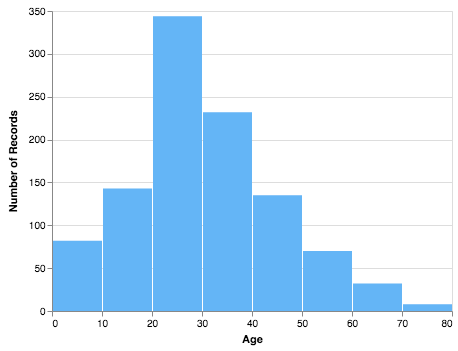


<div style = 'margin-left: 1em; text-indent:-1em;'>high proportion of null values at 20.15%</div>
<div style = 'margin-left: 1em; text-indent:-1em;'>high frequency of floating point numbers with 8 number(s) having frequency over 30</div>
<div style = 'margin-left: 1em; text-indent:-1em;'>outliers are present with 9 high outliers and 0 low outliers</div>

In [8]:
check_column(data, 'age', bins=15)

#### Column Summary: Parch

count      mean      std  min  25%  50%  75%  max
parch  1309.0  0.385027  0.86556  0.0  0.0  0.0  0.0  9.0

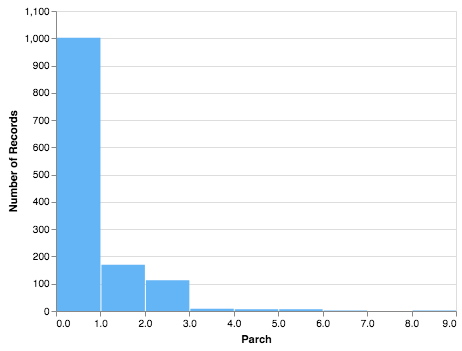


<div style = 'margin-left: 1em; text-indent:-1em;'>high proportion of zero values at 76.49%</div>
<div style = 'margin-left: 1em; text-indent:-1em;'>high frequency of floating point numbers with 3 number(s) having frequency over 45</div>
<div style = 'margin-left: 1em; text-indent:-1em;'>outliers are present with 307 high outliers and 0 low outliers</div>

In [4]:
check_column(data, 'parch', bins=15, missing=0.10, cardinality=25, float_frequency=45, category_frequency=150)

After observing this column more carefully, we can conclude that the high outliers make sense, and they are only considered outliers because of how many individuals traveled without any parents or children.

No abnormalities were found in the sex column, but if you were still curious about its distribution you could check both of these columns in one function call.

In [ ]:
check_column(data, ['parch', 'sex'], bins=[15, False], missing=0.10, cardinality=25, float_frequency=45, category_frequency=150)